In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

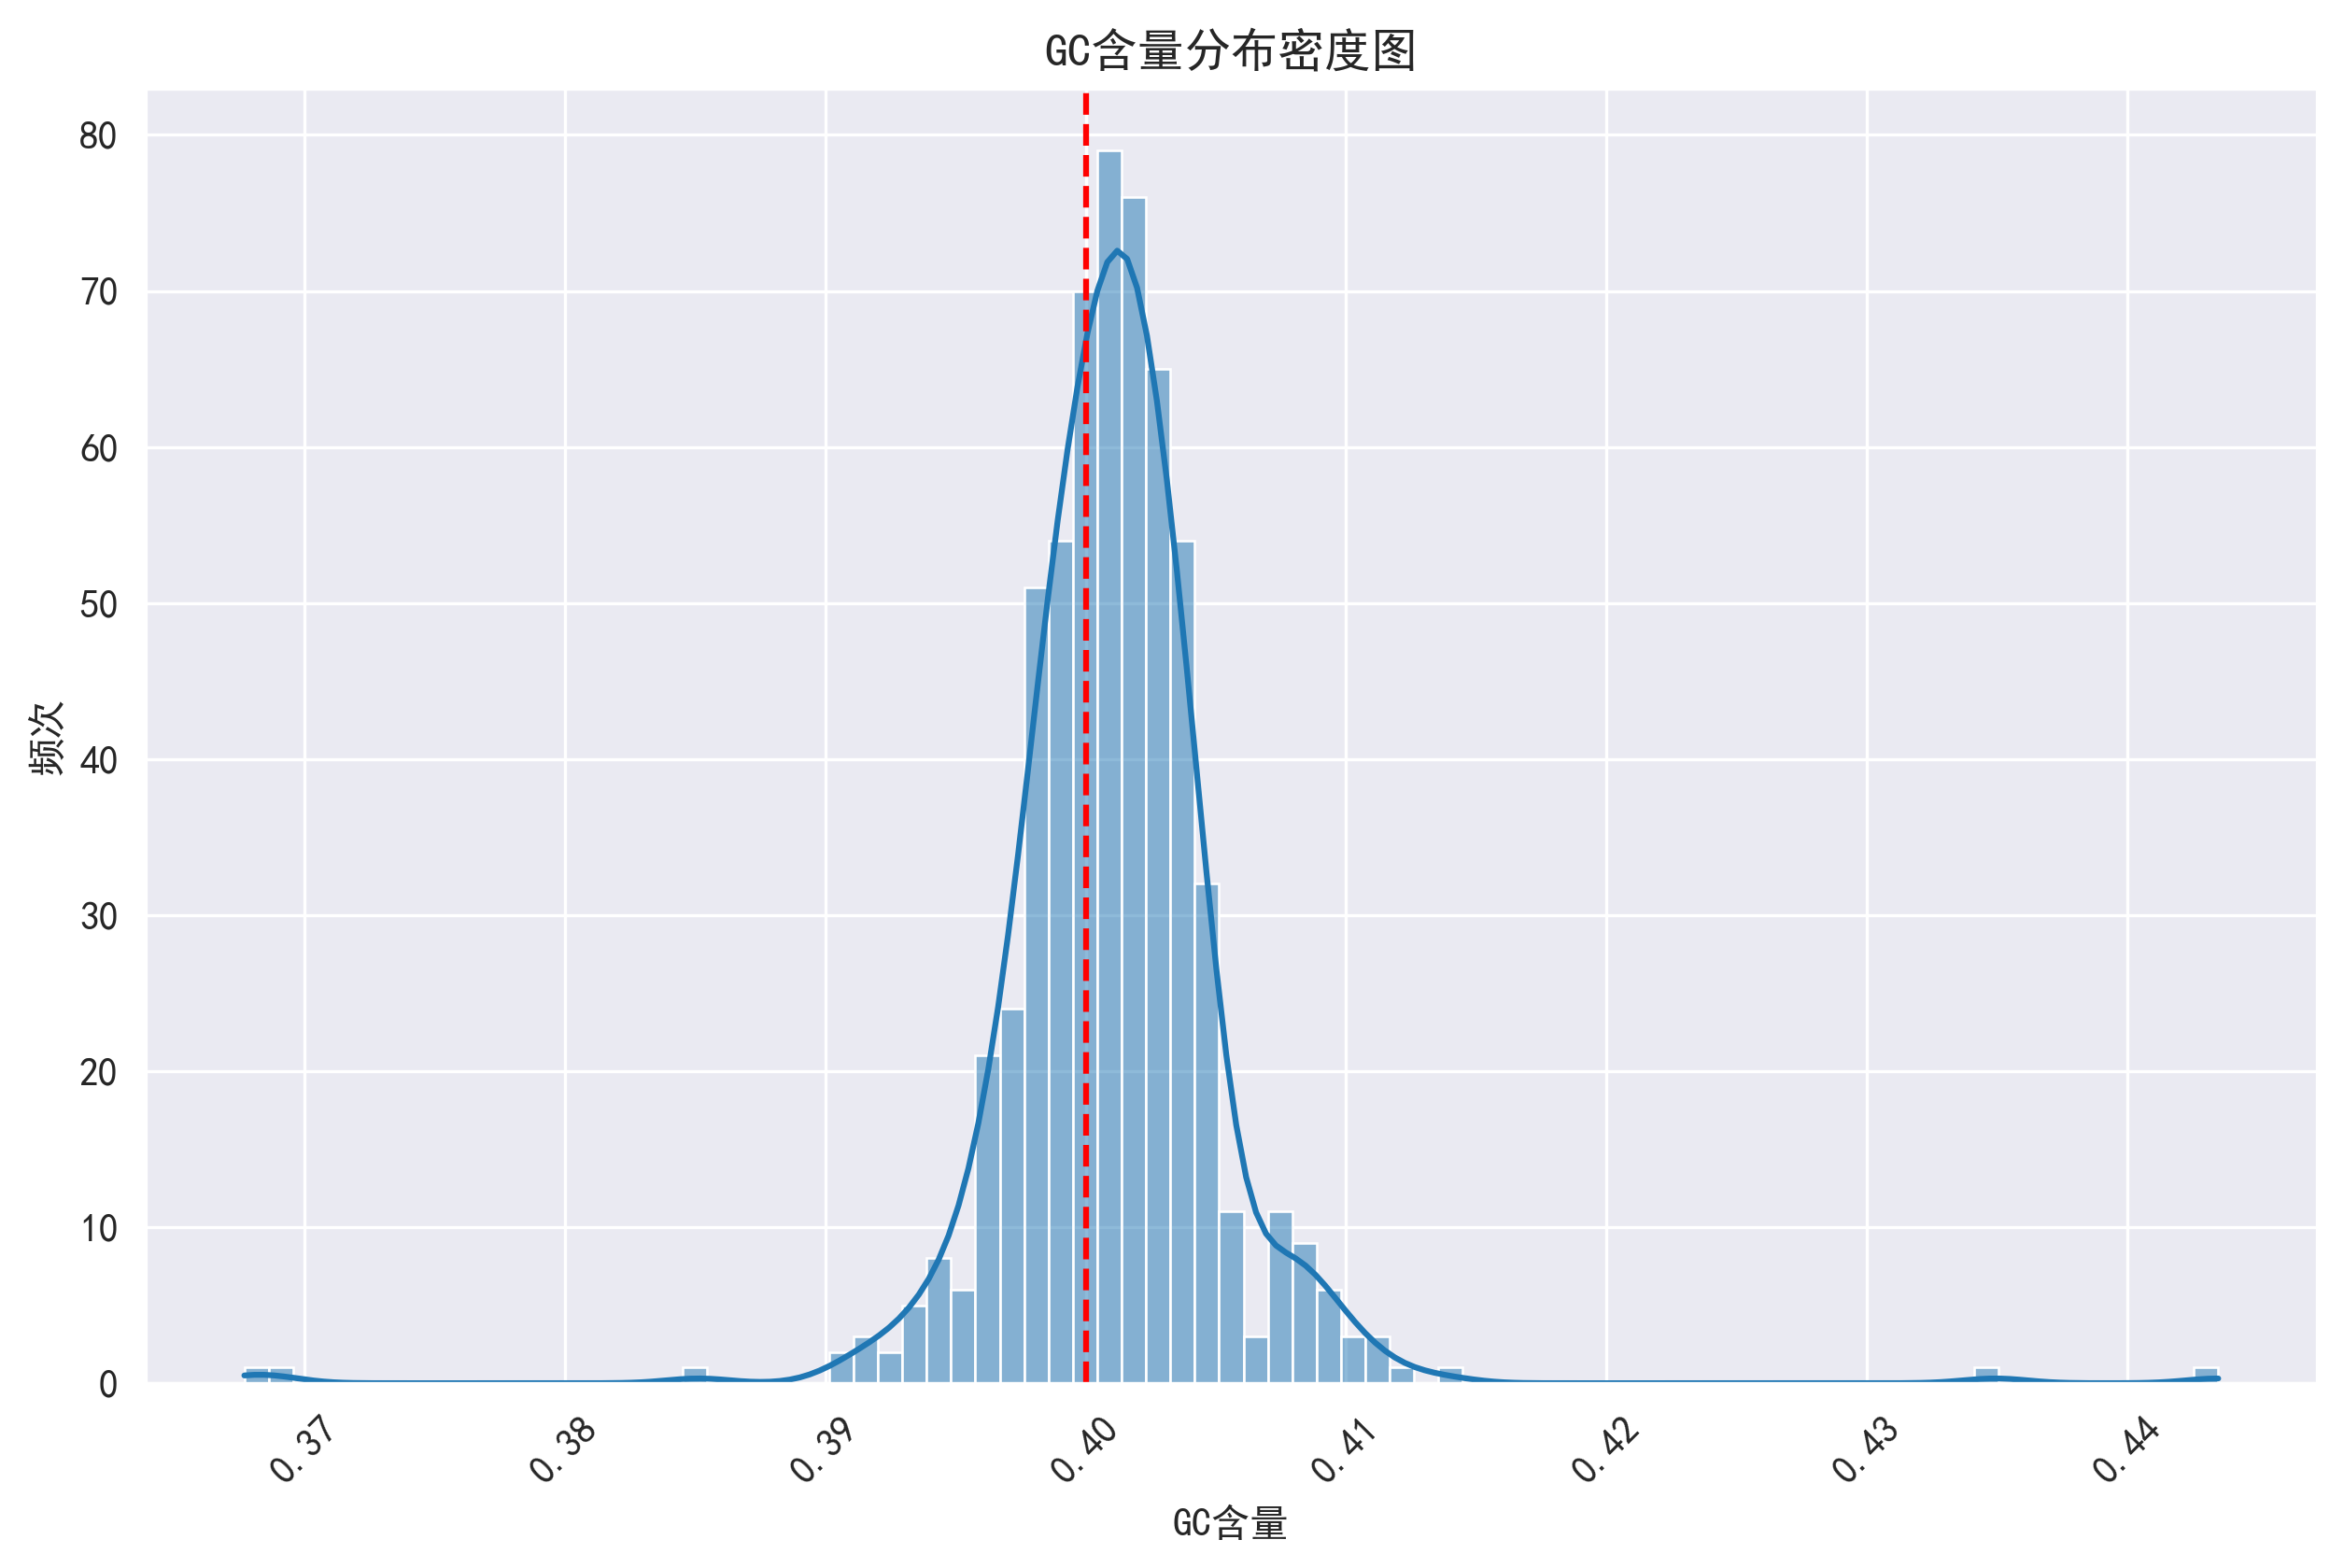

In [43]:
df = pd.read_excel(r'G:\25国赛\C题\附件.xlsx', sheet_name='女胎检测数据')

GC_concentration = df ['GC含量']
less_than_04 = (GC_concentration < 0.4).sum()
greater_than_or_equal_04 = (GC_concentration >= 0.4).sum()

total = len(GC_concentration)
less_than_04_percentage = less_than_04 / total * 100
greater_than_or_equal_04_percentage = greater_than_or_equal_04 / total * 100


plt.figure(figsize=(10, 6))
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.histplot(GC_concentration, kde=True)
plt.axvline(x=0.4, color='r', linestyle='--')

plt.title('GC含量分布密度图')
plt.xlabel('GC含量')
plt.xticks(rotation=45)
plt.ylabel('频次')

plt.savefig(
    'GC含量分布密度图.png',
    bbox_inches='tight',
    dpi=300,
)
plt.show()

In [44]:
def week_to_day(string):
    normalized = string.replace('W', 'w')
    # 移除可能存在的+号
    cleaned = normalized.replace('+', '')

    # 分割周和天
    parts = cleaned.split('w')

    # 提取周数（处理可能的空字符串情况）
    if parts[0].strip():  # 确保周数部分不为空
        week = int(parts[0])
    else:
        return 0  # 或根据实际需求返回错误值

    # 提取天数（如果存在）
    if len(parts) > 1 and parts[1].strip():
        day = int(parts[1])
    else:
        day = 0

    return week * 7 + day

In [45]:
if '检测孕周' in df.columns:
    df['检测孕周'] = df['检测孕周'].apply(week_to_day)

In [46]:
threshold = df['GC含量'].quantile(0.05)
Data2_filtered = df[df['GC含量'] > threshold]
print(f"原始数据量: {len(df)}")
print(f"过滤后数据量: {len(Data2_filtered)}")
print(f"删除了 {len(df) - len(Data2_filtered)} 条最小的5%数据")
print("过滤后的数据前5行:")
print(Data2_filtered.head(30))


原始数据量: 605
过滤后数据量: 574
删除了 31 条最小的5%数据
过滤后的数据前5行:
    序号  孕妇代码  年龄     身高     体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0    1  B001  32  162.0   82.0  2023-08-06 00:00:00  自然受孕  20231119       1   
1    2  B001  32  162.0   82.0  2023-08-06 00:00:00  自然受孕  20231208       2   
2    3  B001  32  162.0   85.0  2023-08-06 00:00:00  自然受孕  20240101       3   
3    4  B001  32  162.0   86.0  2023-08-06 00:00:00  自然受孕  20240123       4   
4    5  B002  33  165.0   96.0  2023-02-15 00:00:00  自然受孕  20230519       1   
5    6  B002  33  165.0   97.5  2023-02-15 00:00:00  自然受孕  20230615       2   
6    7  B002  33  165.0   99.0  2023-02-15 00:00:00  自然受孕  20230711       3   
7    8  B002  33  165.0  100.8  2023-02-15 00:00:00  自然受孕  20230727       4   
8    9  B003  29  163.0   83.0  2023-01-10 00:00:00  自然受孕  20230429       1   
10  11  B003  29  163.0   83.0  2023-01-10 00:00:00  自然受孕  20230608       3   
11  12  B003  29  163.0   85.0  2023-01-10 00:00:00  自然受孕  20230707       4   
13

In [47]:
Data2_filtered['abnormal'] = Data2_filtered['染色体的非整倍体'].notnull().astype(int)

print(Data2_filtered['abnormal'].head(30))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
10    0
11    0
13    0
14    1
15    1
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    0
Name: abnormal, dtype: int64


C:\Users\86138\AppData\Local\Temp\ipykernel_3036\1448326994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_filtered['abnormal'] = Data2_filtered['染色体的非整倍体'].notnull().astype(int)


In [48]:
Data2_filtered.to_excel('筛.xlsx', index=False)